In [29]:
from pyscf import * 
import matplotlib.pyplot as plt
import numpy as np
from kjm2601 import obsidian_media_path as path

In [23]:
def atom(R):
    return f"""
O          0.00000        0.00000        0.00000
O          {R}        0.00000        0.00000
"""

def mol(R, basis = 'STO-3G'):
    m = gto.Mole()
    m.atom = atom(R)
    m.basis = basis
    m.unit = 'angstrom'
    m.build()
    return m


In [33]:
R_range = np.linspace(0.75, 5.0, 100)
E = np.zeros_like(R_range)
for k, R in enumerate(R_range):
  
    mf = scf.RHF(mol(R, basis='cc-pVDZ'))  # Set up a Restricted Hartree-Fock solver
    E[k] = mf.kernel()   # Solve for the energy

    print("Energy: ", E[k])

converged SCF energy = -148.451344071173
Energy:  -148.4513440711732
converged SCF energy = -148.781141807479
Energy:  -148.7811418074794
converged SCF energy = -149.024409294611
Energy:  -149.02440929461108
converged SCF energy = -149.201768643369
Energy:  -149.2017686433688
converged SCF energy = -149.328939278013
Energy:  -149.328939278013
converged SCF energy = -149.417945456394
Energy:  -149.41794545639425
converged SCF energy = -149.477989453915
Energy:  -149.47798945391526
converged SCF energy = -149.516110906114
Energy:  -149.51611090611362
converged SCF energy = -149.537696513646
Energy:  -149.53769651364615
converged SCF energy = -149.546873490267
Energy:  -149.54687349026707
converged SCF energy = -149.546808308499
Energy:  -149.54680830849867
converged SCF energy = -149.539929960179
Energy:  -149.5399299601793
converged SCF energy = -149.528096546175
Energy:  -149.52809654617542
converged SCF energy = -149.512721894712
Energy:  -149.51272189471166
converged SCF energy = -14

9


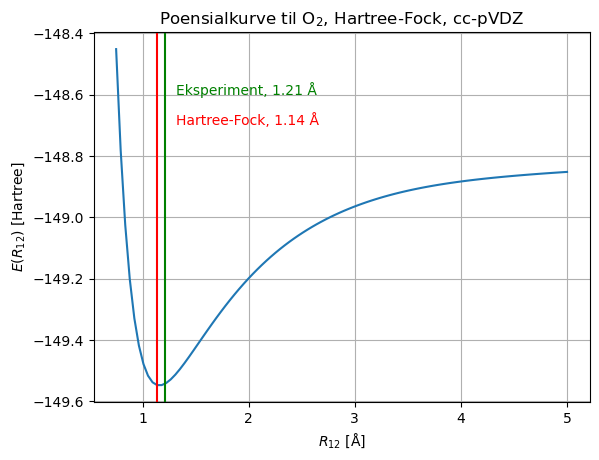

In [46]:
k_min = np.argmin(E)
print(k_min)
R_min = R_range[k_min]
plt.figure()
plt.plot(R_range, E)
plt.title('Poensialkurve til O$_2$, Hartree-Fock, cc-pVDZ')
plt.xlabel('$R_{12}$ [Å]')
plt.ylabel('$E(R_{12})$ [Hartree]')
plt.grid(True)
plt.axvline(1.21, color='g')
plt.text(1.21 + 0.1, -148.6, 'Eksperiment, 1.21 Å', color='g')
plt.axvline(R_min, color='r')
plt.text(1.21 + 0.1, -148.7, f'Hartree-Fock, {R_min:.2f} Å', color='r')
plt.savefig(path + 'O2_HF_PES.pdf')
plt.show()